Análise preliminar:  Thiago Junior Charles 

In [1]:
import random
import numpy as np
import pandas as pd


train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/modulo 6/train.tsv', sep = '\t')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/modulo 6/test.tsv',sep = '\t')
def data(n, seed):
    
    datas = []
    random.seed(seed)
    for i in range(n):
        dia_maximo = 30
        dia_minimo = 1
        mes_maximo = 13
        mes_minimo = 1
              
        dia = int(random.random() * (dia_maximo - dia_minimo) + dia_minimo)
        mes = int(random.random() * (mes_maximo - mes_minimo) + mes_minimo)
              
        datas.append(str(dia)+'-'+str(mes)+'-2018')
              
    return datas

def estoque(n, seed):
    
  np.random.seed(seed)
  mu, sigma = 1, 20
  s = np.random.normal(mu, sigma, n)
  s[s < 0] = s[s < 0] * -0.5
  s = s.astype(int)
  s[s < 1] = 1
        
  return s

train['date']  = data(n = train.shape[0], seed = 10)
train['stock'] = estoque(n = train.shape[0], seed = 10)

test['date']  = data(n = test.shape[0], seed = 15)
test['stock'] = estoque(n = test.shape[0], seed = 15)

In [2]:
train['date'] = train['date'].replace(['29/02/2018', '30/02/2018'],['errada','errada'])

In [3]:
#print(train.iloc['29/02/2018']['date'])
#print(train['date'].values['errada'])

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482535 entries, 0 to 1482534
Data columns (total 10 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   train_id           1482535 non-null  int64  
 1   name               1482535 non-null  object 
 2   item_condition_id  1482535 non-null  int64  
 3   category_name      1476208 non-null  object 
 4   brand_name         849853 non-null   object 
 5   price              1482535 non-null  float64
 6   shipping           1482535 non-null  int64  
 7   item_description   1482531 non-null  object 
 8   date               1482535 non-null  object 
 9   stock              1482535 non-null  int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 113.1+ MB


In [6]:
#train.to_csv("train_atualizado.csv") #cria um csv, foi utilizado para uma verificação Power BI

In [7]:
train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,date,stock
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet,17-6-2018,27
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,17-3-2018,15
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,24-10-2018,14
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,19-2-2018,1
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity,16-4-2018,13


In [8]:
train.tail()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,date,stock
1482530,1482530,Free People Inspired Dress,2,Women/Dresses/Mid-Calf,Free People,20.0,1,"Lace, says size small but fits medium perfectl...",12-10-2018,2
1482531,1482531,Little mermaid handmade dress,2,Kids/Girls 2T-5T/Dresses,Disney,14.0,0,Little mermaid handmade dress never worn size 2t,5-10-2018,10
1482532,1482532,21 day fix containers and eating plan,2,Sports & Outdoors/Exercise/Fitness accessories,NaN,12.0,0,"Used once or twice, still in great shape.",6-8-2018,15
1482533,1482533,World markets lanterns,3,Home/Home Décor/Home Décor Accents,NaN,45.0,1,There is 2 of each one that you see! So 2 red ...,12-2-2018,20
1482534,1482534,Brand new lux de ville wallet,1,Women/Women's Accessories/Wallets,NaN,22.0,0,"New with tag, red with sparkle. Firm price, no...",28-11-2018,9


In [9]:
test.head()

,test_id,name,item_condition_id,category_name,brand_name,shipping,item_description,date,stock
0,0,"Breast cancer ""I fight like a girl"" ring",1,Women/Jewelry/Rings,NaN,1,Size 7,28-1-2018,2
1,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers",1,Other/Office supplies/Shipping Supplies,NaN,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers Lined...",22-2-2018,7
2,2,Coach bag,1,Vintage & Collectibles/Bags and Purses/Handbag,Coach,1,Brand new coach bag. Bought for [rm] at a Coac...,29-1-2018,1
3,3,Floral Kimono,2,Women/Sweaters/Cardigan,NaN,0,-floral kimono -never worn -lightweight and pe...,26-9-2018,4
4,4,Life after Death,3,Other/Books/Religion & Spirituality,NaN,1,Rediscovering life after the loss of a loved o...,25-12-2018,5


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693359 entries, 0 to 693358
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   test_id            693359 non-null  int64 
 1   name               693359 non-null  object
 2   item_condition_id  693359 non-null  int64 
 3   category_name      690301 non-null  object
 4   brand_name         397834 non-null  object
 5   shipping           693359 non-null  int64 
 6   item_description   693359 non-null  object
 7   date               693359 non-null  object
 8   stock              693359 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 47.6+ MB


In [11]:
!pip install  https://github.com/ydataai/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached https://github.com/ydataai/pandas-profiling/archive/master.zip


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport 
pd.set_option('display.max_colwidth',None) 
%matplotlib inline

In [13]:
import pandas_profiling
profile = pandas_profiling.ProfileReport(train)

In [14]:
profile.to_widgets()

/usr/local/lib/python3.7/dist-packages/pandas_profiling/profile_report.py:426: UserWarning: Ipywidgets is not yet fully supported on Google Colab (https://github.com/googlecolab/colabtools/issues/60).As an alternative, you can use the HTML report. See the documentation for more information.
  "Ipywidgets is not yet fully supported on Google Colab (https://github.com/googlecolab/colabtools/issues/60)."


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:4812: RuntimeWarning: overflow encountered in long_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

AttributeError: ignored

In [ ]:
profile.to_file(output_file='Pandas ProfilingReport.html')

**Primeiro entendimento do projeto. **

No primeiro passo fiz a implementação do uso do pandas profiling, no qual vai me dar uma visão rápida dos dados. 


Ao verificar esses dados notei os seguintes pontos. 

1º : o DF se trata de um empresa na qual o seu serviço é a publicação de anúncios em uma plataforma on-line, na qual o “cliente/vendedor” anuncia seu produto preenchendo algum dados, que são, o nome do produto (name), a condição que se encontra o produto (item_condition_id) representado em forma numeral crescente de 1 a 5, a categoria que o produto se encontra (category_name), a marca (brand_name), o preço unitário do anúncio (price), forma de enviou (shipping) no qual 1=CIF e 0=FOB, descrição do item (item_description), data do anúncio(date) e o estoque de quando foi anunciado  (stock).

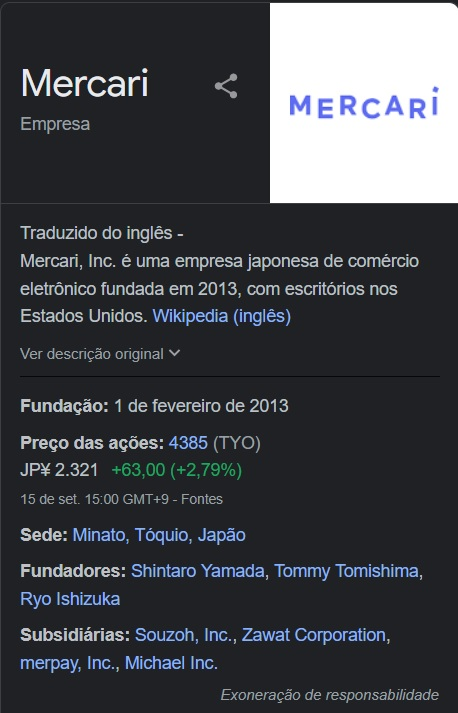


2º:  Na coluna brad_name, 67% dos dados são validos e contêm as marcas e 43% dos dados, são nulos. As marcas mais informadas são: NIKE, PINK e Victoria's Secret.



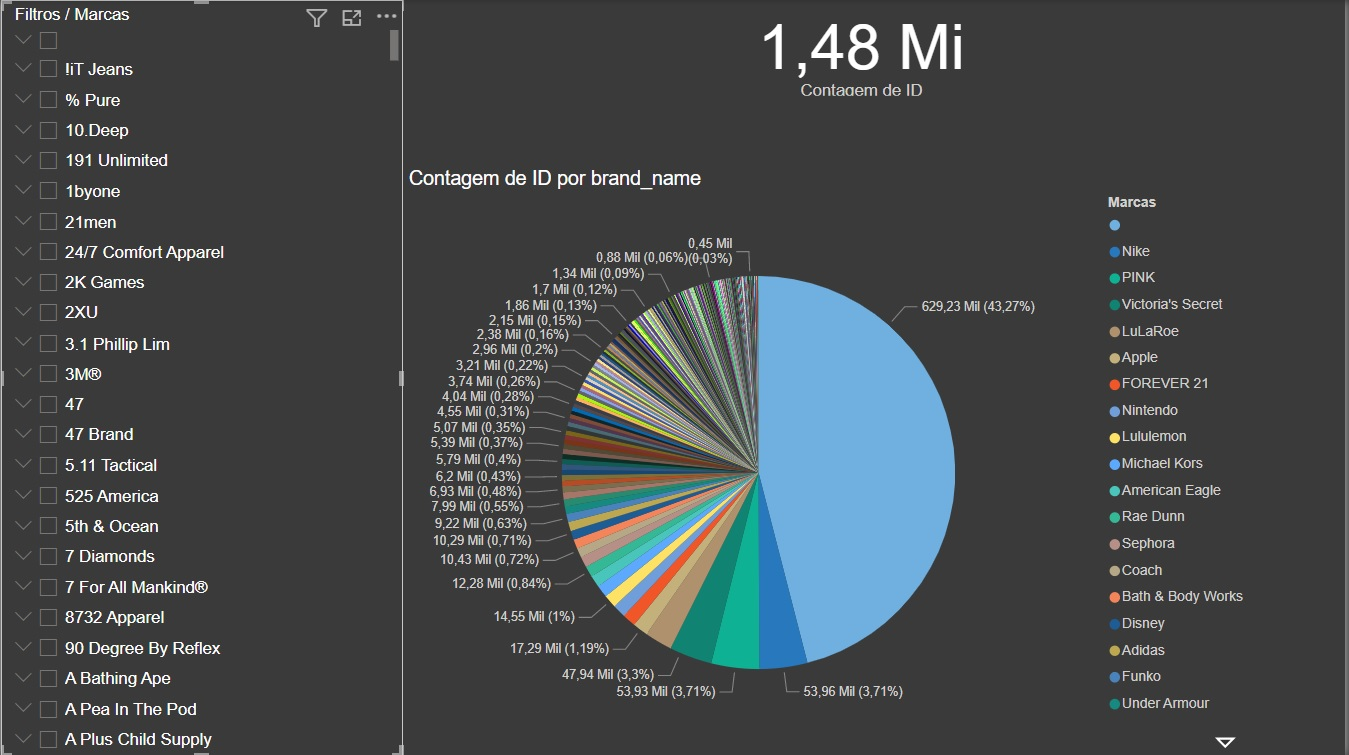


3º: Na coluna category_name, veriquei que temos 10 categorias principais, que são: Beauty, Electronics,Handmade, Home, Kids, Men, Other, Sports & Outdoors, Vintage & Collectibles e Women. A Catergoria Women é responsável por 45% de todos o banco de dados, seguidos por Beauty e Kids. 



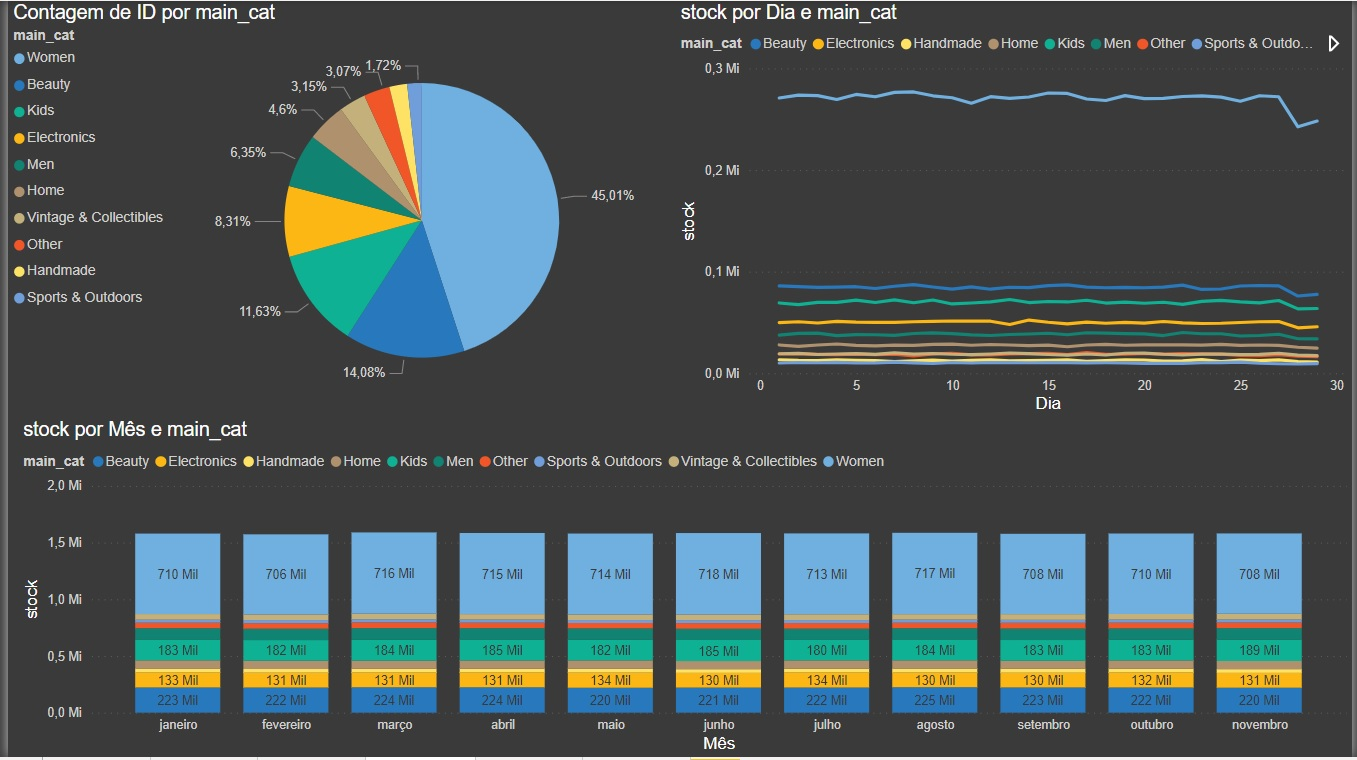


4º: A coluna item_description, a descrição mais usada é a : ‘No description yet”, seguidas por “NEW” e “Brand new”.


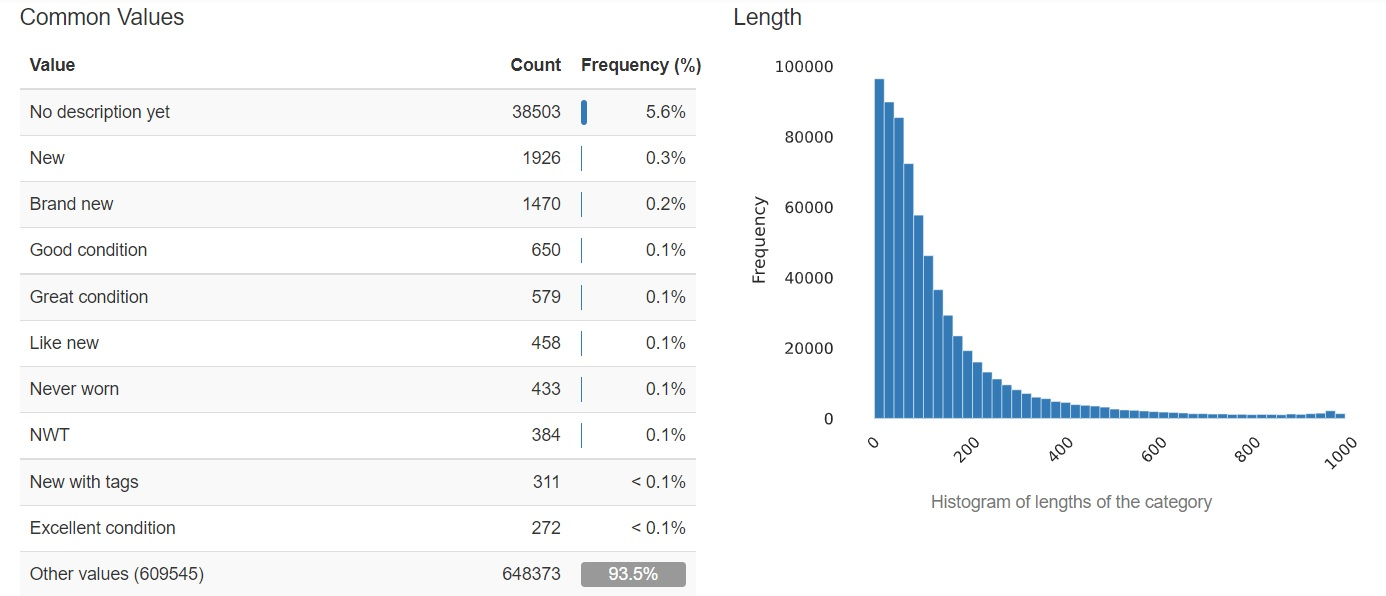


5º: Pude perceber que a coluna stock segue um padrão que se matem o ano todo, não identificando sazonalidade. 


6º: Como não temo a identificação do vendedor e da saída desse material não conseguimos identificar se tem reposição de stock, com isso não podemos saber se o item foi vendido. 

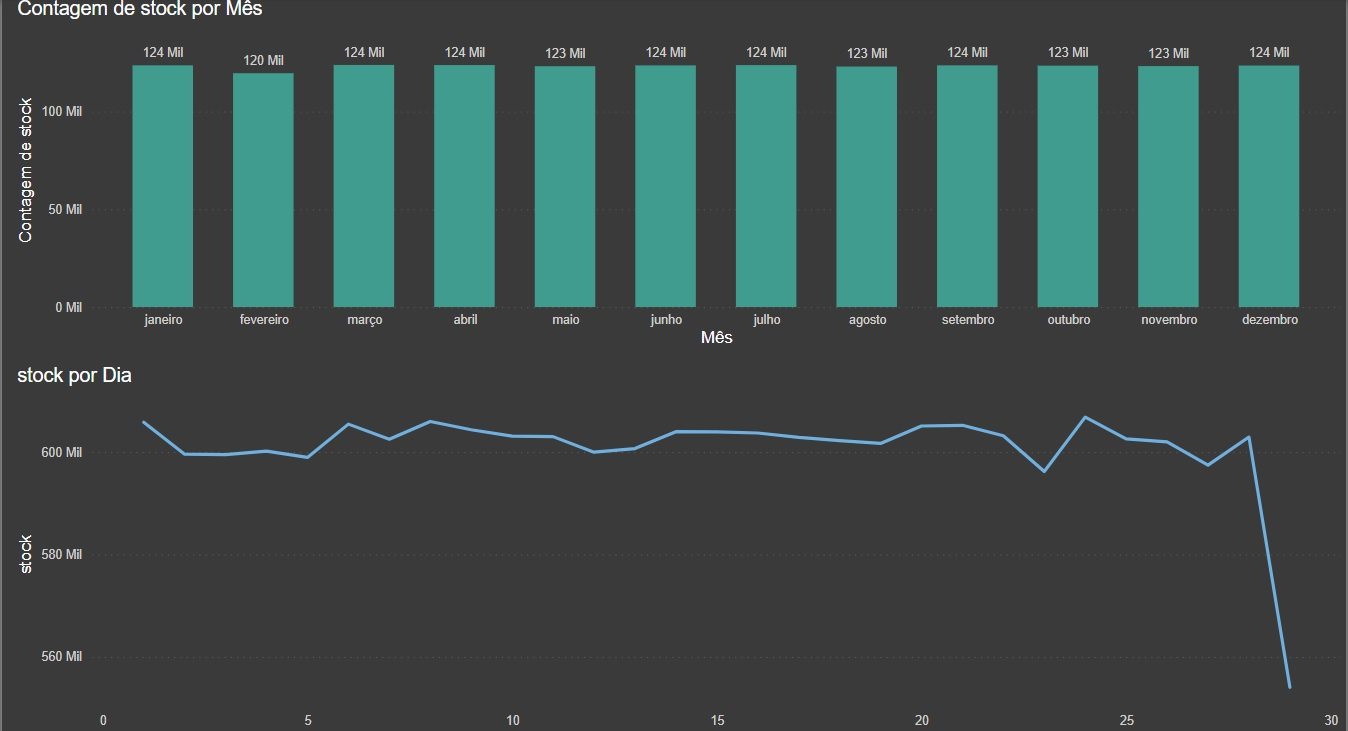
